# 地球暖化和熱帶氣旋(颱風)生成數量的關係

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

In [2]:
NumTropicalCyclone = [0] * 43
MaxWind = [0] * 43

### 資料來源：
* 熱帶氣旋數量：National Oceanic And Atmospheric Administraion： https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data
* 全球年均溫：National Aeronautics and Space Administration：https://data.giss.nasa.gov/gistemp/


In [3]:
for i in range(0, 43):
    path = 'C:/Users/admin/Documents/PythonMLDL/data/tropical_cyclone_historical_data/Year.'
    filepath = path + str(1975 + i) + '.ibtracs_all.v03r10.csv'
    tropicalCyclone = pd.read_csv(filepath)
    section = tropicalCyclone.groupby('Name')
    NumTropicalCyclone[i] = len(section.size())


C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,8,9,10,11,13,14,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
temperature = pd.read_csv('C:/Users/admin/Documents/PythonMLDL/data/GLB.Ts+dSST.csv')

In [5]:
annualTemperature = temperature.loc[95:137,'J-D']


In [6]:
annualTemperature = pd.DataFrame(annualTemperature, dtype=np.float)
NumTropicalCyclone = pd.DataFrame(NumTropicalCyclone, dtype=int)

Text(0,0.5,'地球年均溫')

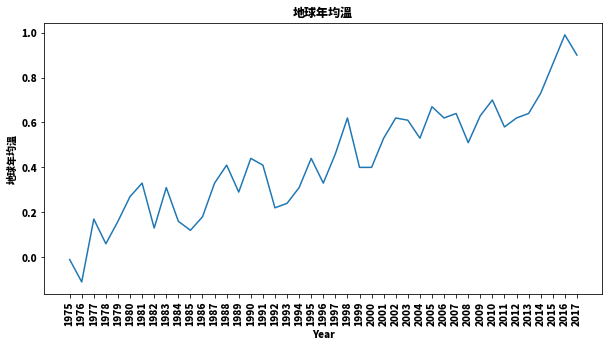

In [18]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(43),annualTemperature)
plt.title("地球年均溫")
plt.xlabel("Year")
plt.xticks(np.arange(43), np.arange(1975,2018), rotation=90)
plt.ylabel("地球年均溫")

Text(0,0.5,'熱帶氣旋生成數量')

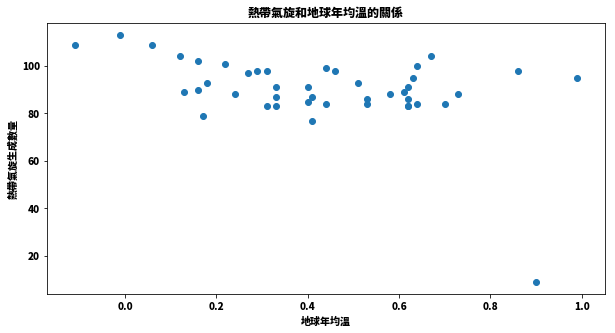

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(annualTemperature, NumTropicalCyclone)
plt.title("熱帶氣旋和地球年均溫的關係")
plt.xlabel("地球年均溫")
plt.ylabel("熱帶氣旋生成數量")



In [10]:
X = annualTemperature.values.reshape(len(annualTemperature), 1)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = NumTropicalCyclone[:-20]
y_test = NumTropicalCyclone[-20:]


In [11]:
# Create linear regression object
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [[-38.83420842]]
Intercept: 
 [103.40927294]
Mean squared error: 368.31
Variance score: -0.07


Text(0,0.5,'熱帶氣旋生成數量')

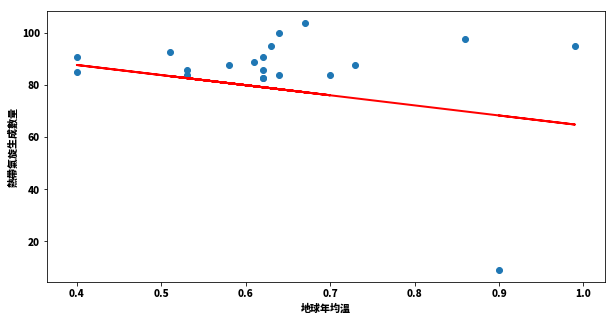

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(annualTemperature[-20:], y_test)
plt.plot(annualTemperature[-20:], y_pred, color='r', linewidth=2)
plt.xlabel("地球年均溫")
plt.ylabel("熱帶氣旋生成數量")

### 尚未做殘差檢定，不過計算出來的 R squared為負值，這個模型大概是沒有甚麼解釋能力。 本來是想看看溫室效應會不會造成熱帶氣旋生成數量增加，但從散佈圖可以看出他們之間可能關聯性不大，或是甚至稍微有點呈現負相關的關係。或許可以探討熱帶氣旋的強度和年均溫的關係，或是將聖嬰和反聖嬰現象的關係也考量進去